<a href="https://colab.research.google.com/github/evansemet/LSTM_Stock_Prediction/blob/main/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [341]:
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import array
import pandas as pd
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
STOCK = 'SPXL'
CSV = STOCK + '.csv'
EPOCHS = 100
BATCH_SIZE = 64

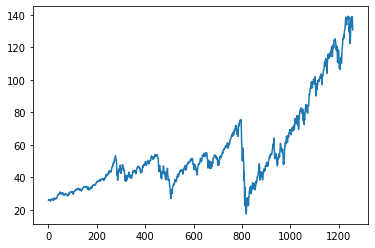

In [ ]:
df = pdr.get_data_tiingo(STOCK, api_key = '84f31c9e37689897603c2ecdc183c499c26570fd')
df.to_csv(CSV)
df = pd.read_csv(CSV)
df1 = df.reset_index()['adjClose']
plt.plot(df1)

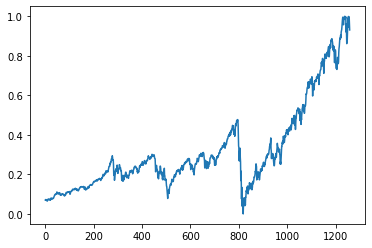

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
plt.plot(df1)

In [ ]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0: training_size, :], df1[training_size: len(df1)]

In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i: (i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_35 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_36 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = 1)

Epoch 1/100
12/12 [==============================] - 3s 302ms/step - loss: 5.8319e-04 - val_loss: 0.0045
Epoch 2/100
12/12 [==============================] - 4s 327ms/step - loss: 5.3903e-04 - val_loss: 0.0038
Epoch 3/100
12/12 [==============================] - 2s 185ms/step - loss: 5.2111e-04 - val_loss: 0.0037
Epoch 4/100
12/12 [==============================] - 2s 185ms/step - loss: 5.2630e-04 - val_loss: 0.0043
Epoch 5/100
12/12 [==============================] - 2s 188ms/step - loss: 5.1104e-04 - val_loss: 0.0038
Epoch 6/100
12/12 [==============================] - 2s 188ms/step - loss: 5.6463e-04 - val_loss: 0.0031
Epoch 7/100
12/12 [==============================] - 2s 186ms/step - loss: 5.2881e-04 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 2s 184ms/step - loss: 5.3771e-04 - val_loss: 0.0037
Epoch 9/100
12/12 [==============================] - 2s 184ms/step - loss: 5.8341e-04 - val_loss: 0.0023
Epoch 10/100
12/12 [==============================] - 2

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(Y_train, train_predict))

46.52012071410809

In [ ]:
math.sqrt(mean_squared_error(Y_test, test_predict))

85.62735341106757

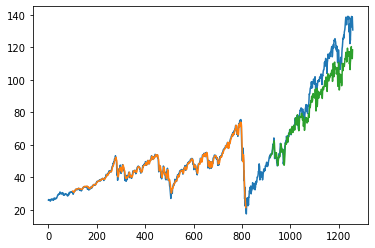

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1: len(df1) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [359]:
X_input = test_data[341:].reshape(1,-1)
temp_input = list(X_input)
temp_input = temp_input[0].tolist()


In [360]:
lst_output = []
n_steps = 100
i = 0
while (i < 30):
    if (len(temp_input) > 100):
        X_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, X_input))
        X_input = X_input.reshape(1, -1)
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

[0.7675515]
101
1 day input [0.7917606  0.78674971 0.8090112  0.79521072 0.81196845 0.8176365
 0.81500784 0.81829367 0.8253582  0.83349063 0.83932297 0.84671609
 0.82667253 0.79455356 0.7994823  0.82215452 0.84646965 0.85189127
 0.85797005 0.84006229 0.86610248 0.87973867 0.87554924 0.8781779
 0.88655676 0.88532458 0.87472778 0.8704562  0.85649143 0.8339835
 0.84071945 0.82511176 0.84909831 0.84384099 0.81615788 0.76711689
 0.76530968 0.79102129 0.8253582  0.82995836 0.82166164 0.76268102
 0.76711689 0.73508006 0.76555612 0.73080848 0.75701296 0.7687598
 0.79192489 0.78683186 0.76662401 0.7601345  0.7687598  0.81525428
 0.83702289 0.84605892 0.86840256 0.88088871 0.88926757 0.88474956
 0.90052153 0.90454667 0.89033547 0.92007222 0.92606885 0.9319012
 0.94455164 0.96451305 0.97962786 0.99162114 0.99564628 0.98414588
 0.95703779 0.95720208 0.98233867 0.98307798 0.99654988 0.98825316
 1.         0.99375693 0.98422802 0.98948535 0.99704275 0.92023651
 0.96073435 0.89764643 0.86125588 0.905

In [361]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

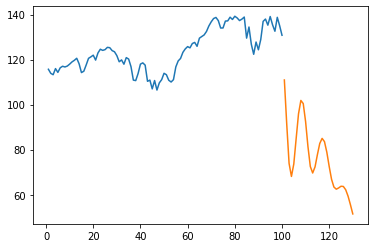

In [362]:
plt.plot(day_new, scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

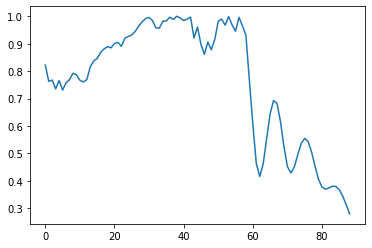

In [363]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

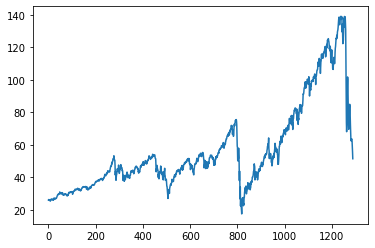

In [364]:
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)